# ***Data Visualization of COVID-19 Confirmed Cases in the World***

Note that these plots have been done after dropping the columns where 70% number of confirmed cases is zero.

### **Countrywise Plot**

In [0]:
#imported all the required packages
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Specified the path to my dataset and loaded it in a dataframe
df_covid = pd.read_csv('https://raw.githubusercontent.com/Yogita98/Data-Visualization-of-Corona-Positive-Cases/master/time_series_2019-ncov-Confirmed.csv',index_col=0)
df_conti=pd.read_csv('/content/drive/My Drive/ML_Mentorship/c2c.csv')

In [58]:
#Dropped the columns whose total number of positive cases on a particular day were less than 70%
for i in df_covid.columns:
  var=0.7*df_covid[i].count()
  if len(df_covid[df_covid[i]==0])>var:
    df_covid.drop([i],axis=1,inplace=True)
df_covid.columns

Index(['Country/Region', 'Lat', 'Long', '03-04-2020', '03-05-2020',
       '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020',
       '03-11-2020', '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [59]:
column_list=[]
column_list=df_covid.columns
column_list

Index(['Country/Region', 'Lat', 'Long', '03-04-2020', '03-05-2020',
       '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020',
       '03-11-2020', '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [60]:
country_dict=dict()
for i in range(487):
    # print(df.iloc[i][-1]) 
    # values of last column
    country_dict[df_covid.iloc[i][0]]=country_dict.get(df_covid.iloc[i][0],0)+df_covid.iloc[i][-1]
country_dict

{'Afghanistan': 40,
 'Albania': 89,
 'Algeria': 201,
 'Andorra': 113,
 'Angola': 2,
 'Antigua and Barbuda': 1,
 'Argentina': 225,
 'Armenia': 194,
 'Australia': 1314,
 'Austria': 3244,
 'Azerbaijan': 65,
 'Bahamas, The': 4,
 'Bahrain': 332,
 'Bangladesh': 27,
 'Barbados': 14,
 'Belarus': 76,
 'Belgium': 3401,
 'Benin': 2,
 'Bhutan': 2,
 'Bolivia': 24,
 'Bosnia and Herzegovina': 126,
 'Brazil': 1593,
 'Brunei': 88,
 'Bulgaria': 187,
 'Burkina Faso': 75,
 'Cabo Verde': 3,
 'Cambodia': 84,
 'Cameroon': 40,
 'Canada': 1465,
 'Cape Verde': 1,
 'Central African Republic': 3,
 'Chad': 1,
 'Chile': 632,
 'China': 81397,
 'Colombia': 231,
 'Congo (Brazzaville)': 3,
 'Congo (Kinshasa)': 30,
 'Costa Rica': 134,
 "Cote d'Ivoire": 14,
 'Croatia': 254,
 'Cruise Ship': 712,
 'Cuba': 35,
 'Cyprus': 95,
 'Czechia': 1120,
 'Denmark': 1514,
 'Djibouti': 1,
 'Dominica': 1,
 'Dominican Republic': 202,
 'East Timor': 1,
 'Ecuador': 789,
 'Egypt': 327,
 'El Salvador': 3,
 'Equatorial Guinea': 6,
 'Eritrea': 

In [72]:
#The labels are computed in such a way that only those countries having Corona positive cummulatively 
#of all the days more than 1500 are plotted in the pie chart and the rest are combined and shown as Others. 
x=0
summ=0
country_labels=[]
country_sizes=[]
other_labels=[]
other_sizes=[]
for key,value in country_dict.items():
  if int(value)>=1500:
    country_labels.append(key)
    country_sizes.append(value)
  else:
    summ=summ+int(value)
country_labels.append('Others')
country_sizes.append(summ)
print(country_labels)
print(country_sizes)

['Germany', 'Italy', 'Sweden', 'Spain', 'Belgium', 'Switzerland', 'Austria', 'Brazil', 'Norway', 'Portugal', 'US', 'China', 'Iran', 'Korea, South', 'France', 'Denmark', 'United Kingdom', 'Netherlands', 'Others']
[24873, 59138, 1934, 28768, 3401, 7245, 3244, 1593, 2383, 1600, 33272, 81397, 21638, 8897, 16176, 1514, 5741, 4216, 28925]


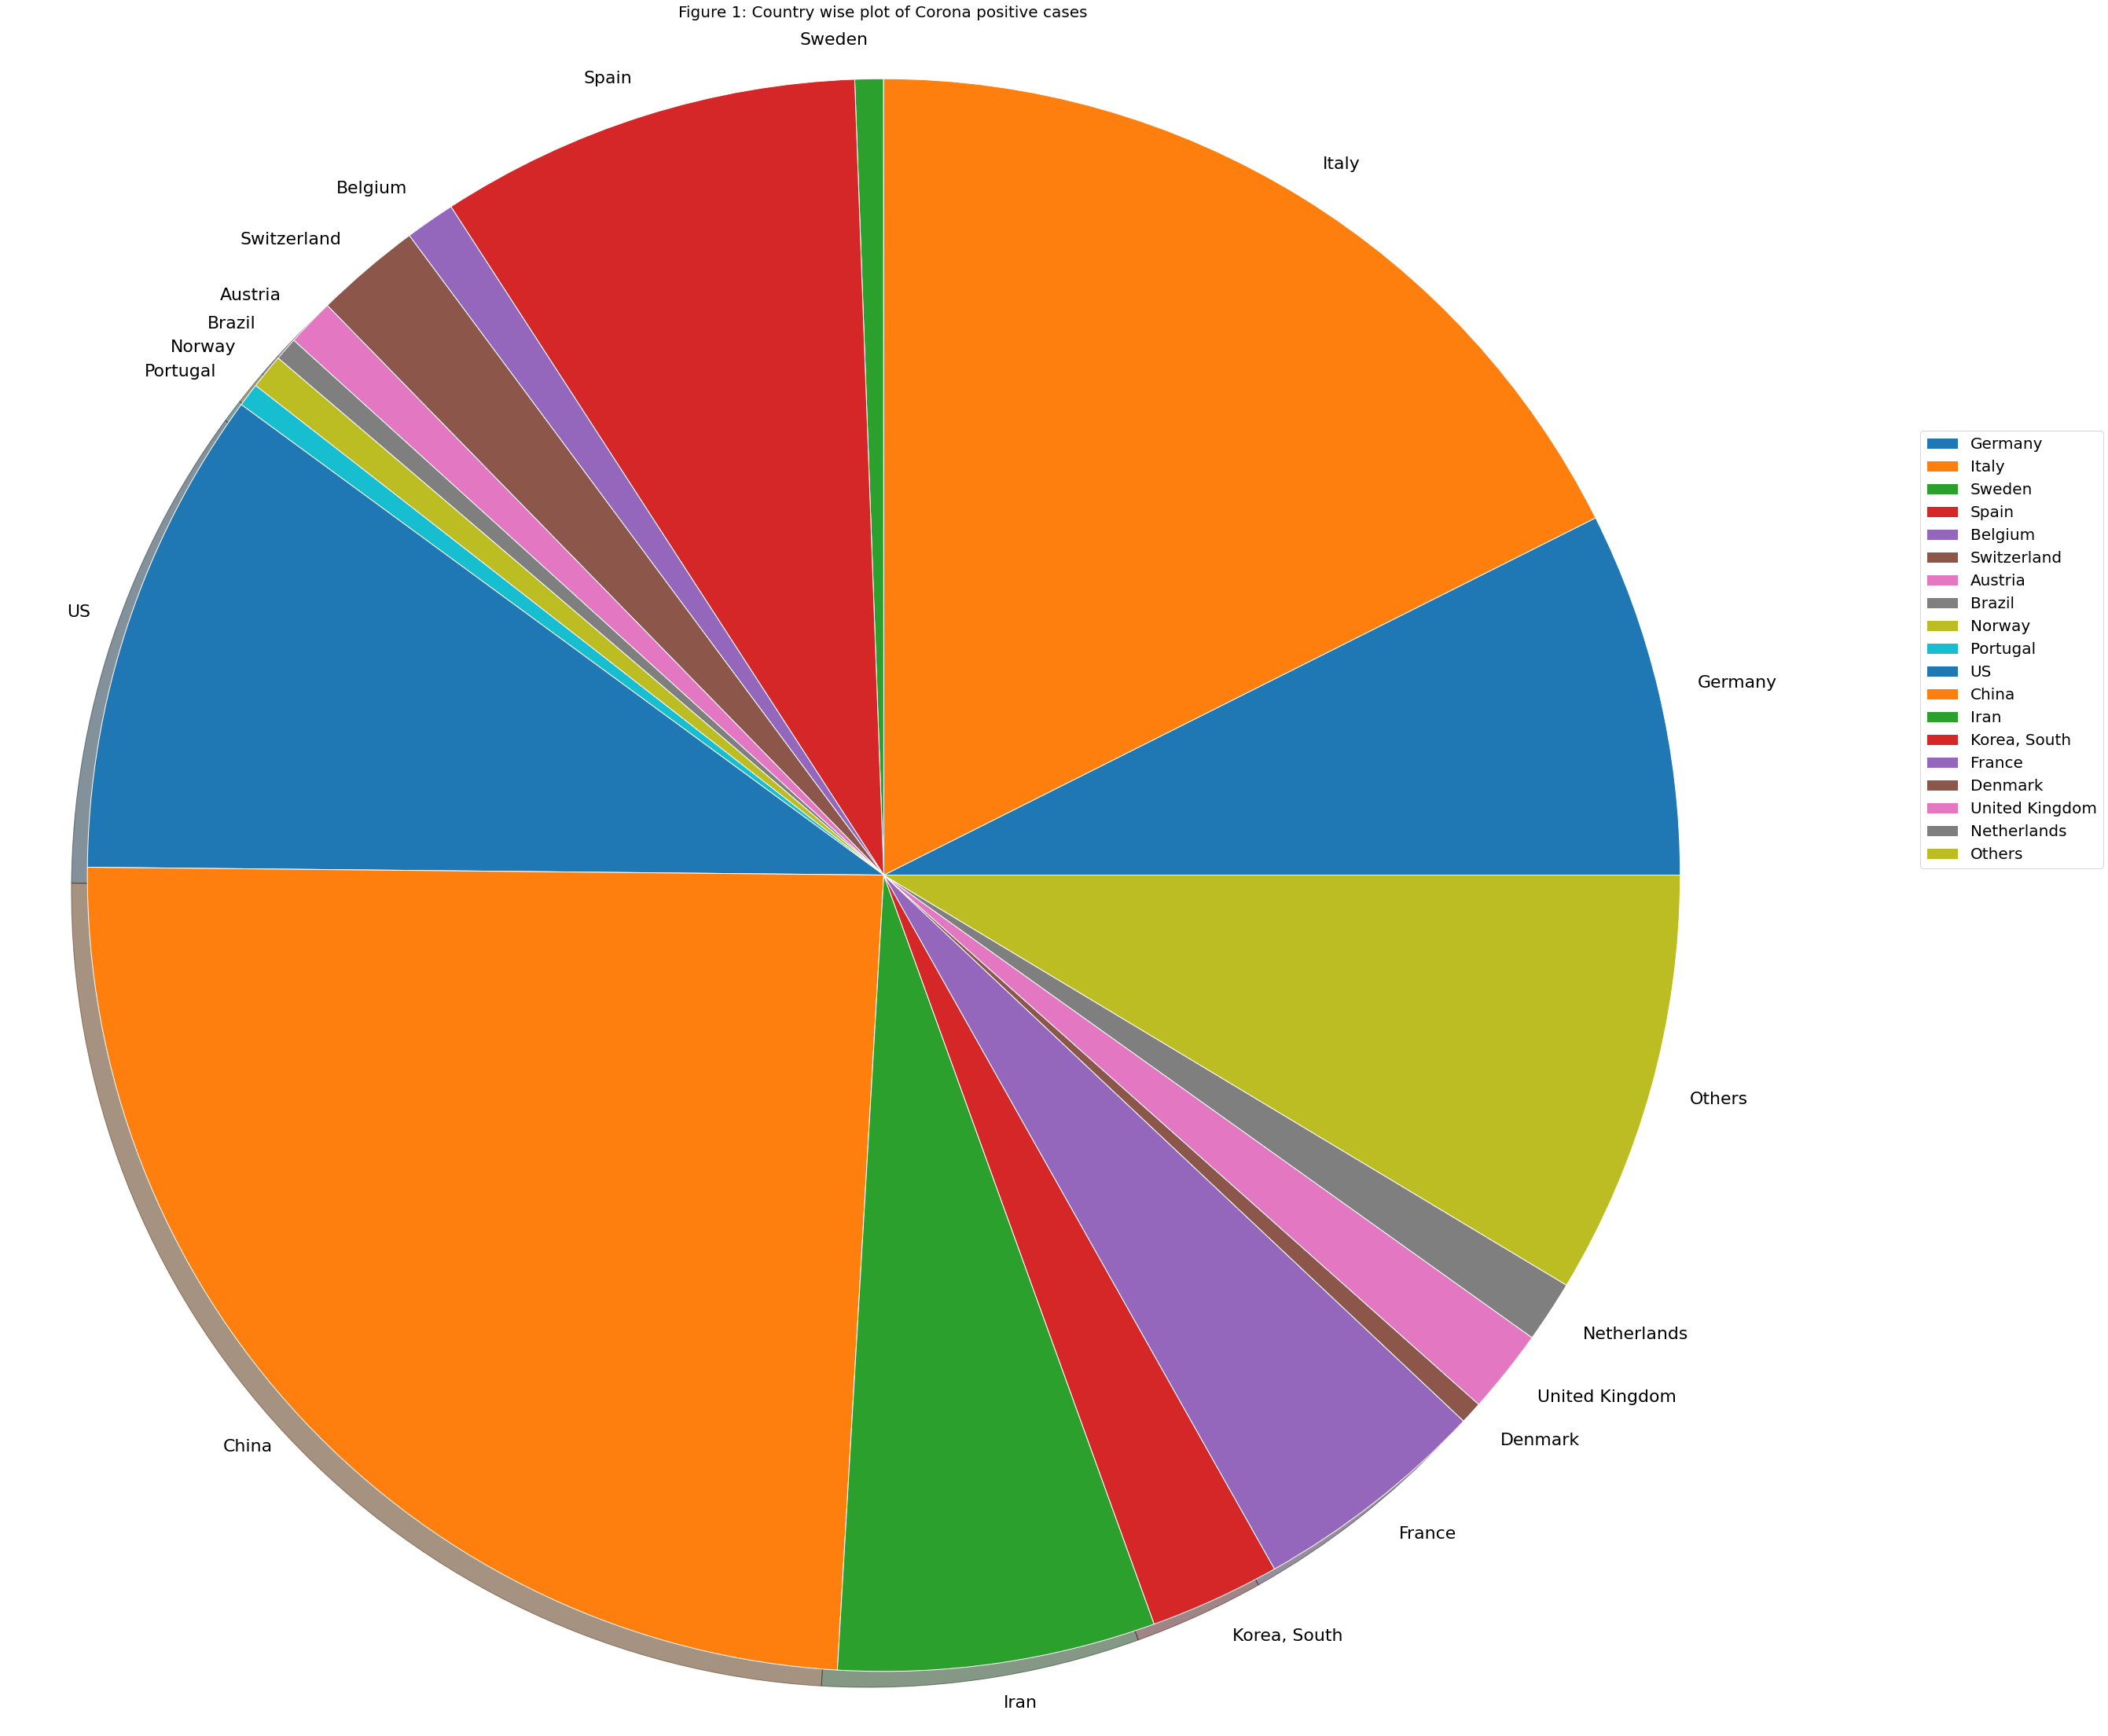

In [73]:
#Country wise plot of Corona positive cases
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=[40, 40])
ax = fig.add_subplot(111)
sizes=country_sizes
pie_wedge_collection = ax.pie(sizes, labels=country_labels, labeldistance=1.05,shadow=True)
for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
    

ax.set_title( "Figure 1: Country wise plot of Corona positive cases",fontsize=20)
ax.axis('equal')
ax.legend(loc='lower right',bbox_to_anchor=(1.2, 0.5),fontsize=20)


### **Datewise Plot**

In [74]:
df_covid.columns

Index(['03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020',
       '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [64]:
#Computed the sum of Corona positive cases date wise and put it in a new row of the dataframe
drop_columns=['Lat', 'Long','Country/Region']
for i in range(0,len(drop_columns)):
  if drop_columns!=0:
    df_covid.drop(labels=drop_columns[i],axis=1,inplace=True)
    i=i-1
dates_list=[]
for col in df_covid.columns:
   dates_list.append(col)
print(dates_list)
df_covid.loc['Total'] = pd.Series(df_covid.sum())
datewise_sum=[]
for value in df_covid.iloc[-1].values:
  datewise_sum.append(value)
print(datewise_sum)

['03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20']
[95120, 97882, 101784, 105821, 109795, 113561, 118592, 125865, 128343, 145193, 156094, 167446, 181527, 197142, 214910, 242708, 272166, 304524, 335955]


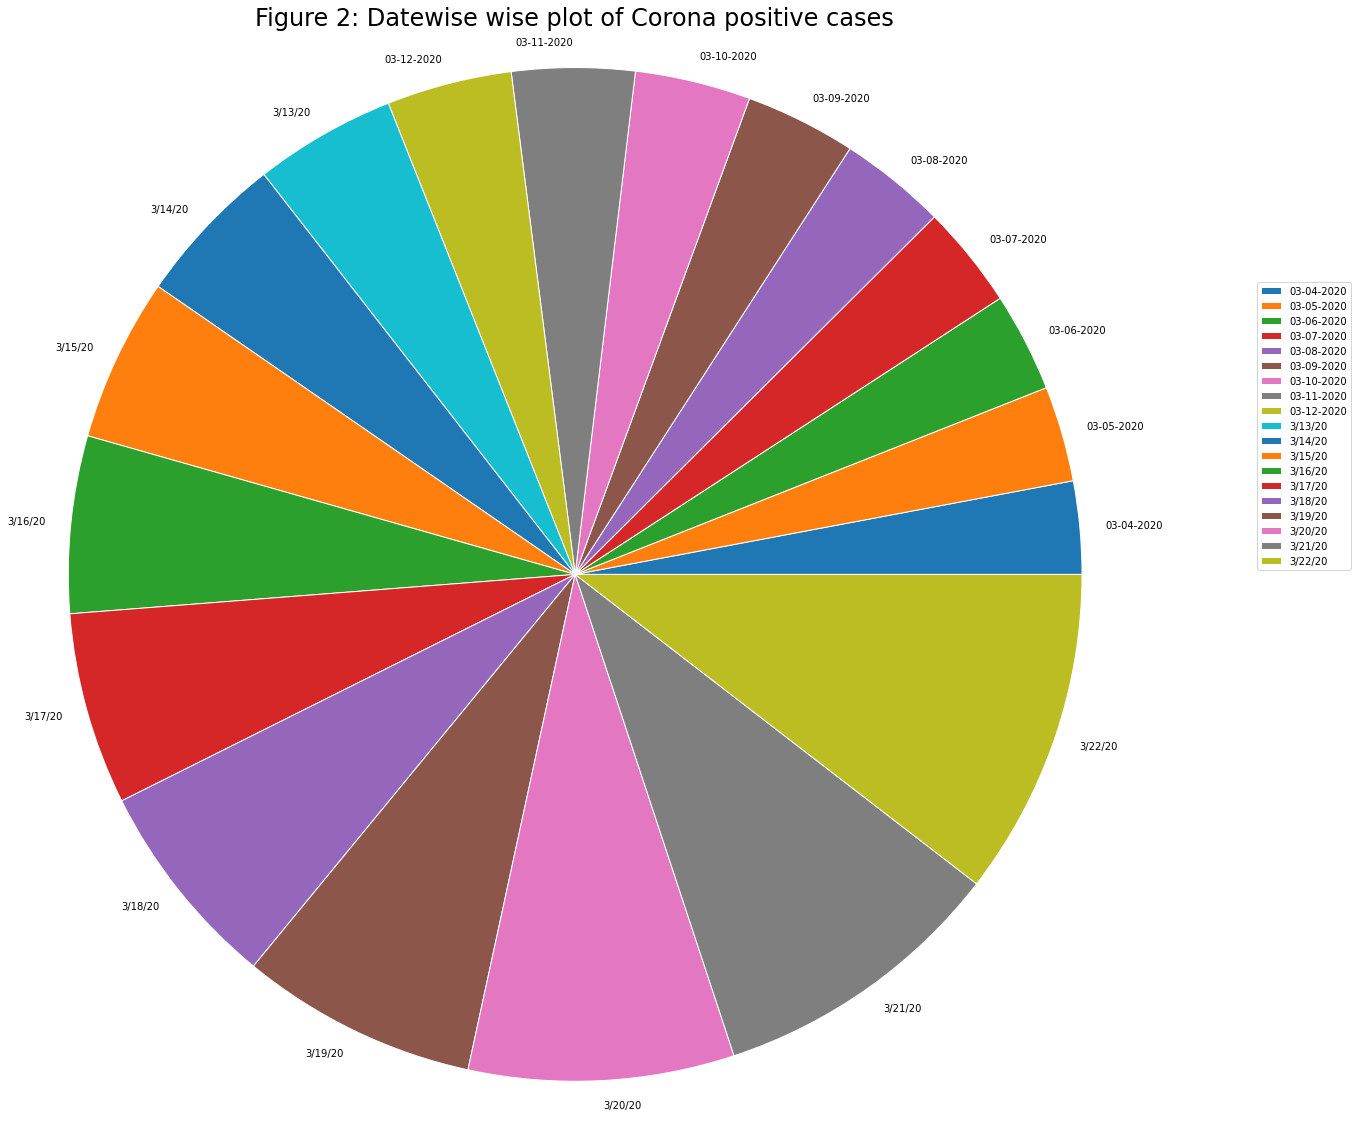

In [75]:
#Date wise plot of Corona positive cases
plt.rcParams.update({'font.size': 10})
sizes=datewise_sum
labels=dates_list
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes, labels=labels, labeldistance=1.05)
for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
    

ax.set_title( "Figure 2: Datewise wise plot of Corona positive cases",fontsize=24)
ax.axis('equal')
ax.legend(loc='lower right',bbox_to_anchor=(1.2, 0.5),fontsize=10)

### **Continentwise Plot**

In [66]:
continent_dict=dict()
for i in country_dict:
    temp=df_conti.loc[df_conti['Country']==i]
#     print(temp)
    if len(temp)>0:    
        continent_dict[temp.iloc[0][0]]=continent_dict.get(temp.iloc[0][0],0)+country_dict[i]
#         print(country_dict[i])
#         print(continent_dict.get(temp.iloc[0][0],0))
#         print("and")
#         print(continent_dict[temp.iloc[0][0]])

continent_dict


{'Africa': 1015,
 'Asia': 113013,
 'Europe': 162094,
 'North America': 35349,
 'Oceania': 1316,
 'South America': 4096}

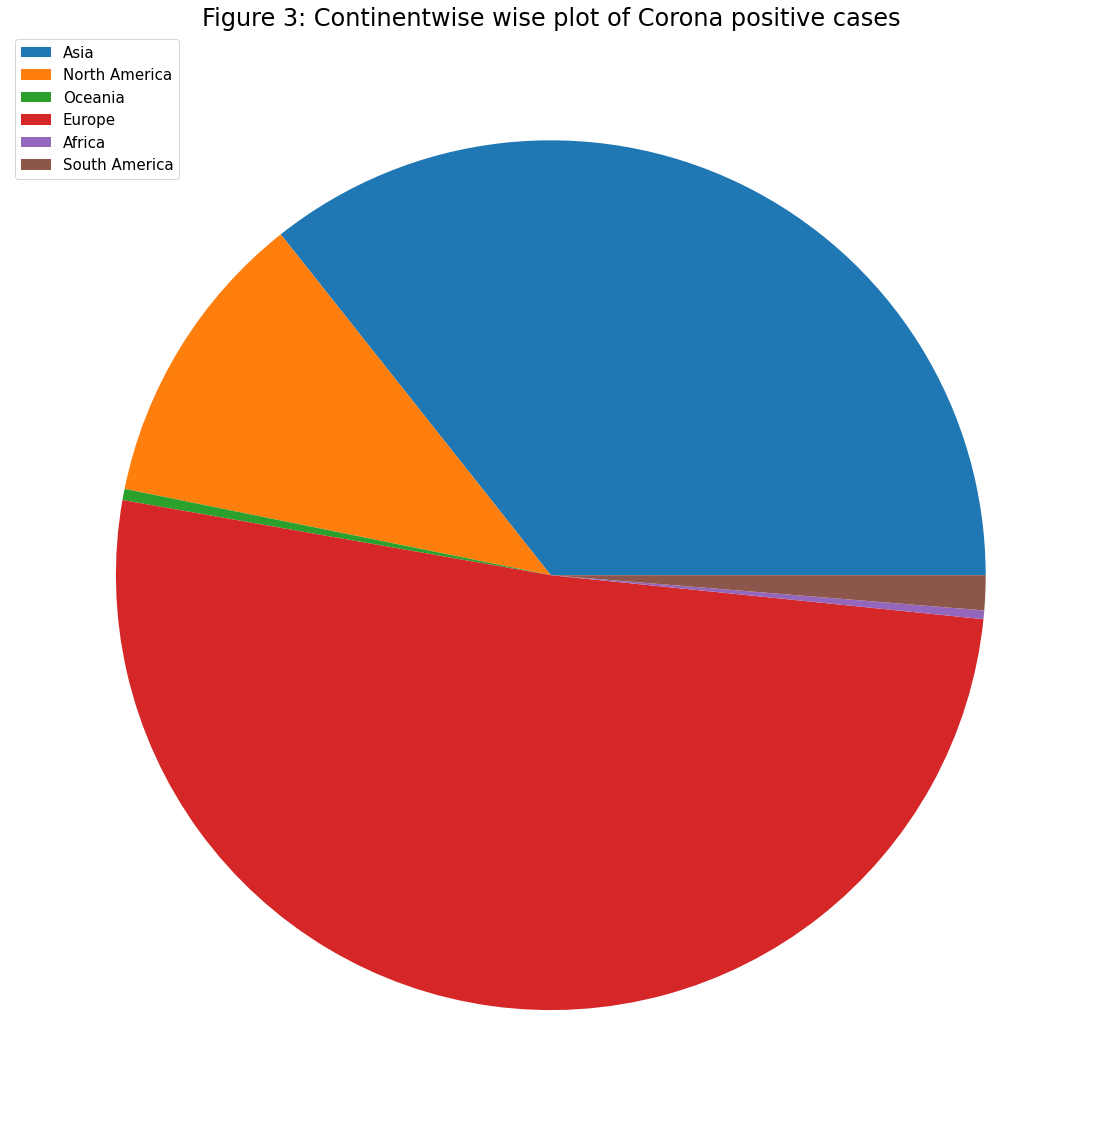

In [76]:
plt.figure(figsize=(50,20))
plt.pie(continent_dict.values())
plt.title('Figure 3: Continentwise wise plot of Corona positive cases',size=24)
plt.legend(continent_dict.keys(),prop={'size': 15})
plt.show()